In [1]:
CUDA_INDEX = 1
NAME = 'AIDS'
CLASSES = 38

In [2]:
import sys
sys.path.insert(0, '../..')
sys.path.insert(0, '../../pyged/lib')

In [3]:
import os
import pickle
import random
import time

import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.set_device(CUDA_INDEX)
torch.backends.cudnn.benchmark = True
import torch.optim
import torch_geometric as tg
import torch_geometric.data
from tqdm.auto import tqdm

from neuro import config, datasets, metrics, models, train, utils, viz
import pyged

from importlib import reload
reload(config)
reload(datasets)
reload(metrics)
reload(models)
reload(pyged)
reload(train)
reload(utils)
reload(viz)

<module 'neuro.viz' from '../../neuro/viz.py'>

In [4]:
train_set, train_meta = torch.load(f'../data/{NAME}/train.pt', map_location='cpu')
train_set = [_[:1000] for _ in train_set]
train_meta = [_[:1000] for _ in train_meta]

In [5]:
nodes = [h.num_nodes for h in train_set[1]]
edges = [h.num_edges for h in train_set[1]]
print(f'avg target nodes: {sum(nodes)/len(nodes):.3f}')
print(f'avg target edges: {sum(edges)/len(edges):.3f}')

avg target nodes: 14.808
avg target edges: 30.622


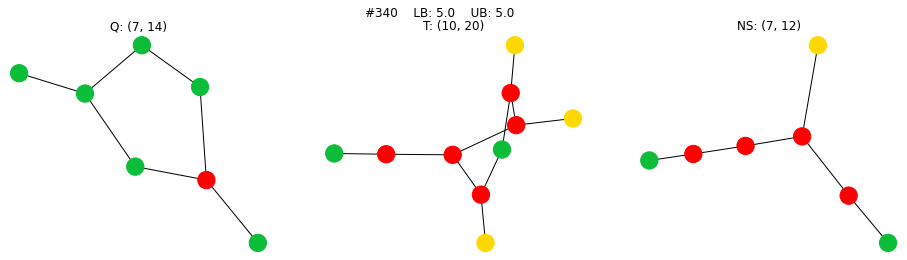

---

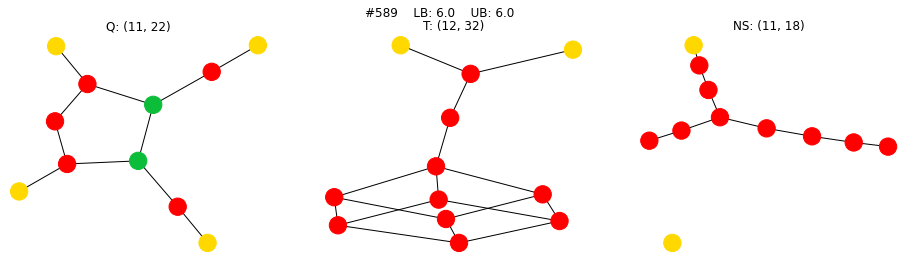

---

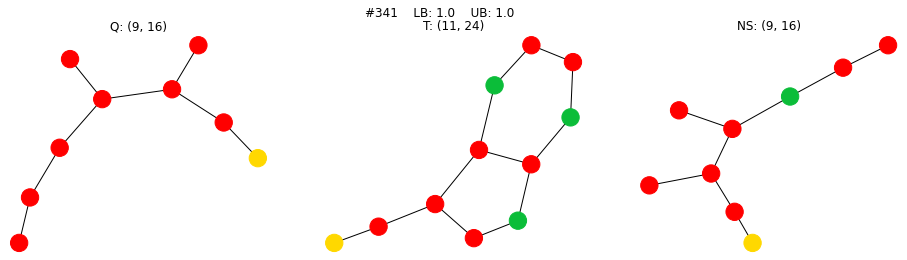

---

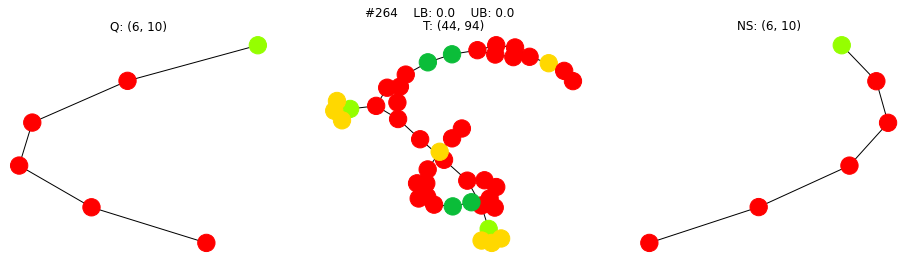

---

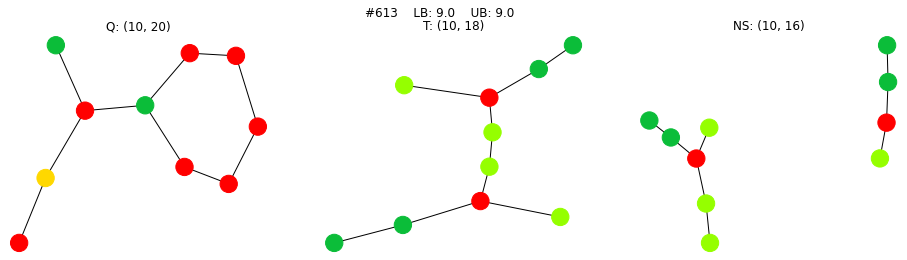

---

In [6]:
viz.plot_inner_dataset_plus(train_set, train_meta, n_items=5, random=True)

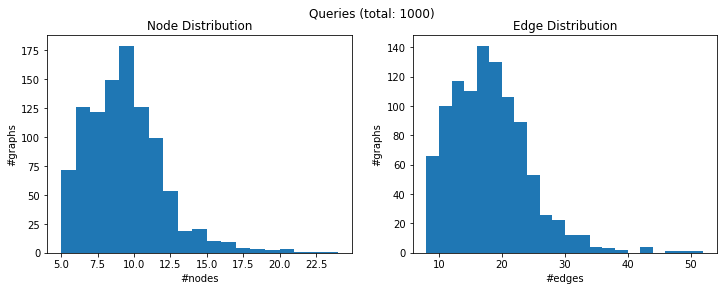

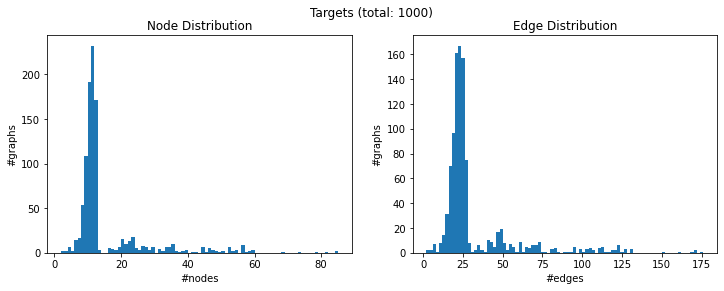

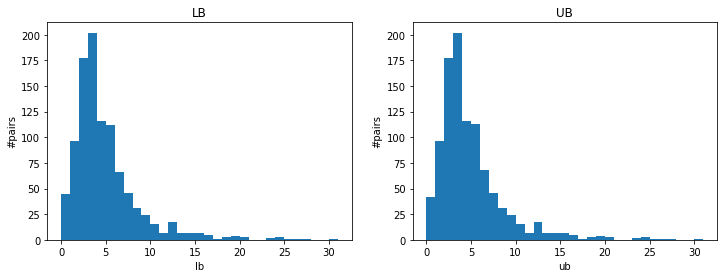

In [7]:
viz.plot_dataset_dist(train_set)

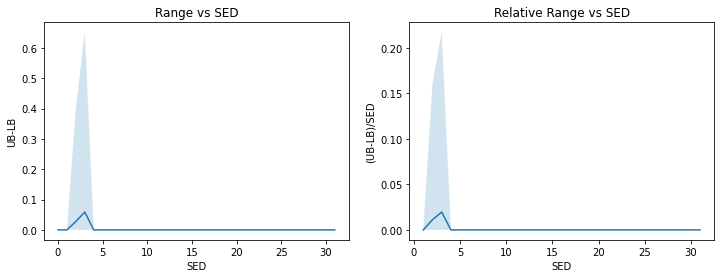

In [8]:
queries, targets, lb, ub = train_set
sed = (lb+ub)/2
plt.figure(figsize=(12,4))
plt.subplot(121)
viz.plot_corr(sed, ub-lb, show_std=True)
plt.xlabel('SED')
plt.ylabel('UB-LB')
plt.title('Range vs SED')
plt.subplot(122)
viz.plot_corr(sed, (ub-lb)/sed, show_std=True)
plt.xlabel('SED')
plt.ylabel('(UB-LB)/SED')
plt.title('Relative Range vs SED')
plt.show()

In [9]:
val_set, _ = torch.load(f'../data/{NAME}/val.pt', map_location='cpu')

In [10]:
model = models.NormSEDModel(8, CLASSES, 64, 64).to(config.device)

In [11]:
loader = tg.data.DataLoader(list(zip(*train_set)), batch_size=200, shuffle=True)
val_loader = tg.data.DataLoader(list(zip(*val_set)), batch_size=1000, shuffle=True)

In [ ]:
dump_path = os.path.join(f'../runlogs/{NAME}-FS2', str(time.time()))
os.mkdir(dump_path)
train.train_full(model, loader, val_loader, lr=1e-3, weight_decay=1e-3, cycle_patience=5, step_size_up=2000, step_size_down=2000, dump_path=dump_path)

dump path: ../runlogs/AIDS-FS2/1622045691.6759143
